In [2]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salesMKJktSby.csv')

In [4]:
df

,Cabang,Invoice_ID,Date,Kode Pelanggan,Nama Pelanggan,Lokasi,Kode_Item,Nama_Item,Jumlah,Harga,Potongan%,Total
0,Surabaya,0058/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKGS0001,Matan Ta'lim Muta'alim Renggang,1,6500,5,6175
1,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00017,Fathul Mu'in Jilid 1 CD 385,1,54900,5,52155
2,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00018,Fathul Mu'in Jilid 2 CD 437,1,57000,5,54150
3,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00019,Fathul Mu'in Jilid 3 CD 526,1,63000,5,59850
4,Surabaya,0059/KSR/MKSBY/0923,9/2/2023,UMUM,UMUM/CASH,Undefined,MKI00021,Fathul Qorib Jilid 1 CD 334,1,39900,5,37905
...,...,...,...,...,...,...,...,...,...,...,...,...
9476,Jakarta,1358/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKQ00002,Al-Qur'an Tanggung Resleting HVS 624,2,59500,40,71400
9477,Jakarta,1359/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKB00001,Berjanji Tanggung CD Hijau,3,23000,21,54000
9478,Jakarta,1359/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKB00004,Berjanji Besar HVS Hijau,1,32000,18,26000
9479,Jakarta,1360/KSR/UTM/0924,9/30/2024,UMUM,UMUM/CASH,Undefined,MKI00071,Tuntunan Fiqih Shalat & Wirid CD 128,1,6500,23,5000


In [8]:
data_description = df.describe(include='all').transpose()
data_description


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Cabang,9481,2,Jakarta,6782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Invoice_ID,9481,3526,0026/JL/UTM/1023.,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,9481,313,10/20/2023,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kode Pelanggan,9481,70,UMUM,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama Pelanggan,9481,84,UMUM/CASH,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lokasi,9481,79,Undefined,7766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kode_Item,9481,1077,MKGS0001,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama_Item,9481,1078,Matan Ta'lim Muta'alim Renggang,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jumlah,9481.0,NaN,NaN,NaN,25.339627,96.727833,0.0,1.0,3.0,10.0,2000.0
Harga,9481.0,NaN,NaN,NaN,25926.764054,44214.876745,1000.0,7500.0,13800.0,29000.0,1515000.0


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Jumlah'] = pd.to_numeric(df['Jumlah'])
df['Harga'] = pd.to_numeric(df['Harga'])
df['Potongan%'] = pd.to_numeric(df['Potongan%'])
df['Total'] = pd.to_numeric(df['Total'])

In [13]:
print(df.isnull().sum())

Cabang            0
Invoice_ID        0
Date              0
Kode Pelanggan    0
Nama Pelanggan    0
Lokasi            0
Kode_Item         0
Nama_Item         0
Jumlah            0
Harga             0
Potongan%         0
Total             0
dtype: int64


In [16]:
# Identify anomalies where 'Jumlah', 'Harga', or 'Total' have values <= 0
anomalies = df[(df['Jumlah'] <= 0) | (df['Harga'] <= 0) | (df['Total'] <= 0)]
anomalies

,Cabang,Invoice_ID,Date,Kode Pelanggan,Nama Pelanggan,Lokasi,Kode_Item,Nama_Item,Jumlah,Harga,Potongan%,Total
665,Jakarta,0171/KSR/UTM/0923,2023-09-26,UMUM,UMUM/CASH,Undefined,MKI00040,Terjemah Al Berjanji HVS 164,0,22500,11,0
1138,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKGD0014,900 Materi Pokok,1,45000,100,0
1147,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKK00010,Kalender 4 Lembar Kaligrafi ART MK 2024,11,7200,100,0
1149,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKK00004,Kalender 6 Lembar Kosongan Masjid MK 2024,13,9100,100,0
1206,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKMCA0035,Sam Pengenalan Fiqih,1,10500,100,0
1210,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKMCA0087,Sam Tuntunan Do'a Sehari Hari,1,10500,100,0
1229,Jakarta,0026/JL/UTM/1023.,2023-10-20,UMUM,UMUM/CASH,Undefined,MKI00038,Terjemah Juz' Amma Tanggung HVS 116,4,16900,100,0
2734,Jakarta,0742/KSR/UTM/1223,2023-12-30,UMUM,UMUM/CASH,Undefined,MKGS0003,Matan Arba'in Nawawi Renggang,0,3500,20,0
2810,Jakarta,0002/JL/UTM/0124,2024-01-04,UMUM,UMUM/CASH,Undefined,MKMSXH0001,Finger Counter,41,10000,100,0
2811,Jakarta,0003/JL/UTM/0124,2024-01-04,UMUM,UMUM/CASH,Undefined,MKMSXH0003,Counter Warna,2,25000,100,0


The rows were flagged as anomalies because they meet one or more of the following criteria based on the conditions provided:
1.	Jumlah (Quantity): A value of 0 is flagged as anomalous because it implies no items were purchased, which could indicate incorrect or incomplete data entry.
2.	Harga (Price): If the price of an item is less than or equal to 0, it is flagged. Items with zero or negative prices are not realistic in a typical sales dataset.
3.	Total (Total Sales): A value of 0 is flagged because it suggests no revenue was generated from the transaction, which may indicate a problem with how the total was calculated or recorded.

Examples:

- Row 665: Jumlah is 0, meaning no items were purchased, but there is a price recorded, which is inconsistent.
- Row 1138: Potongan% (discount) is 100%, resulting in a Total of 0. While a 100% discount could be valid, it is unusual and worth investigating.
- Rows 1147 and 1149: Both have high discounts (100%), which reduce Total to 0, despite non-zero Jumlah and Harga.

These anomalies may represent:
- Errors in data entry or calculations.
- Unique or edge cases, such as promotional offers (e.g., 100% discounts).

In [19]:
# Calculate min and max values for specified columns and display them in a table
min_max_summary = df[['Jumlah', 'Harga', 'Potongan%', 'Total']].agg(['min', 'max'])
min_max_summary

,Jumlah,Harga,Potongan%,Total
min,0,1000,0,0
max,2000,1515000,100,32686500


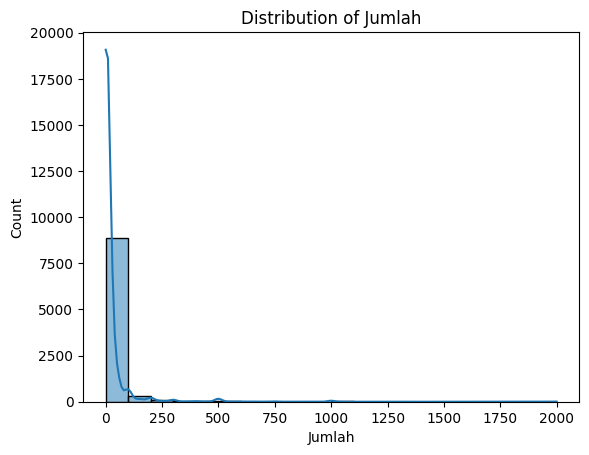

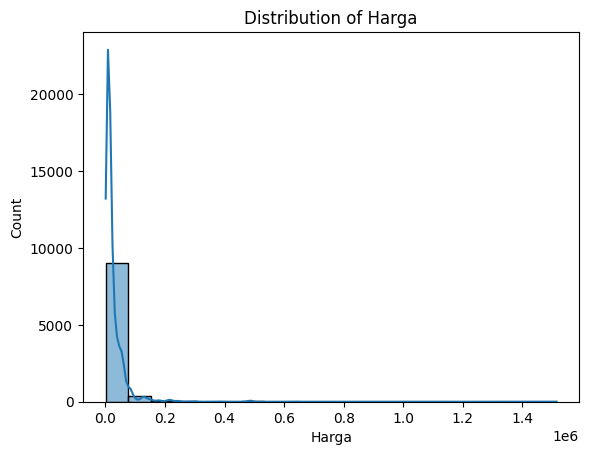

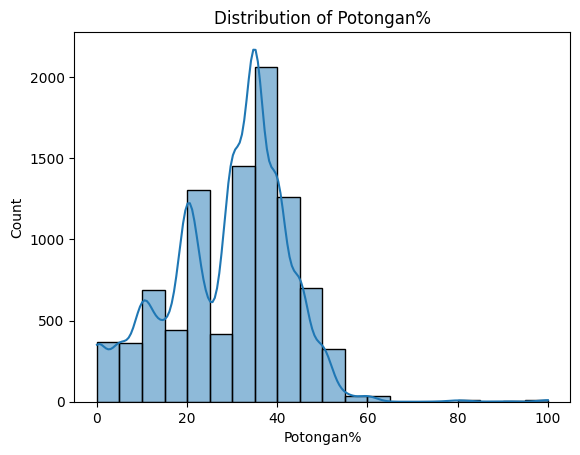

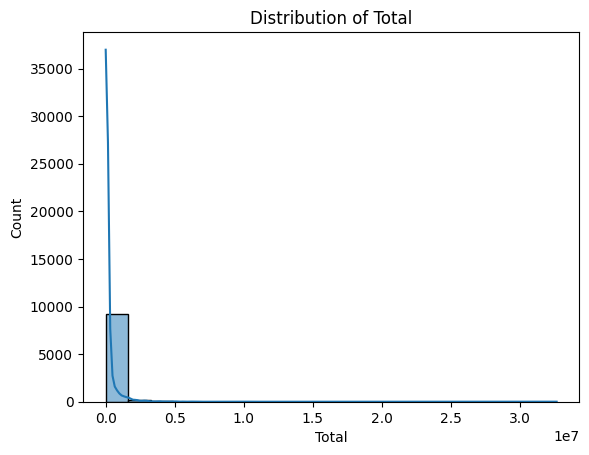

In [20]:
for col in ['Jumlah', 'Harga', 'Potongan%', 'Total']:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

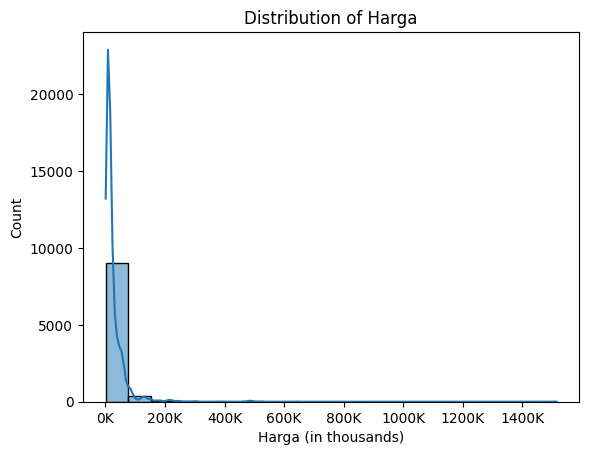

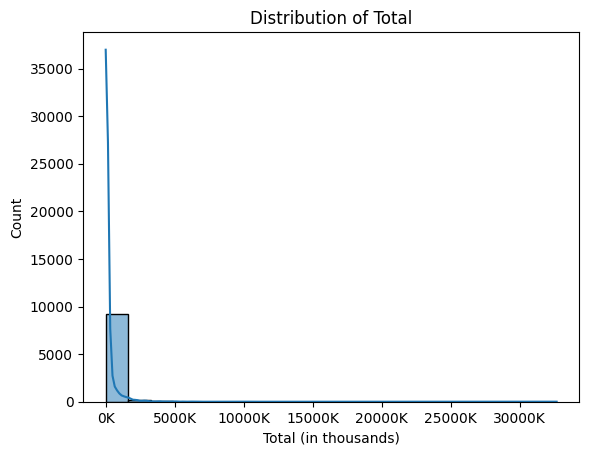

In [22]:
# Re-importing necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the scale for 'Harga'
sns.histplot(df['Harga'], kde=True, bins=20)
plt.title('Distribution of Harga')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))  # Convert to 'K' (thousands)
plt.xlabel('Harga (in thousands)')
plt.ylabel('Count')
plt.show()

# Adjusting the scale for 'Total'
sns.histplot(df['Total'], kde=True, bins=20)
plt.title('Distribution of Total')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))  # Convert to 'K' (thousands)
plt.xlabel('Total (in thousands)')
plt.ylabel('Count')
plt.show()

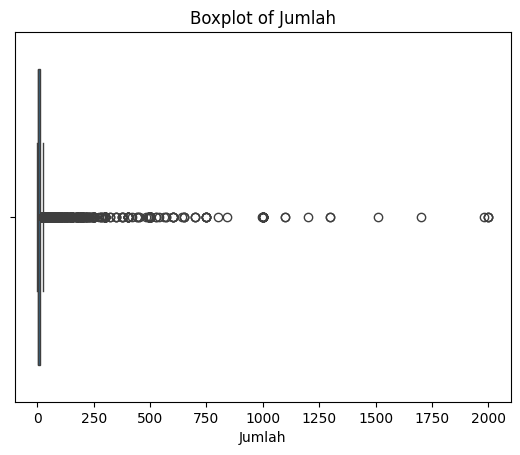

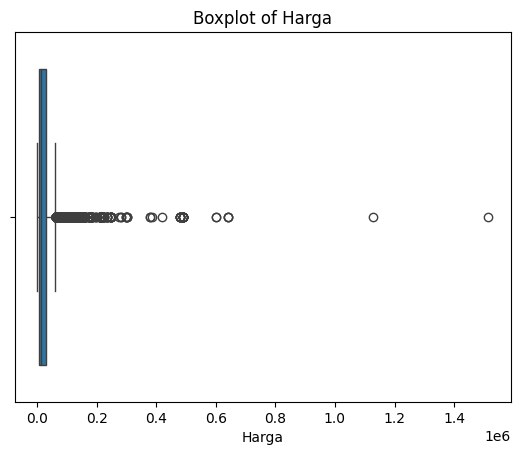

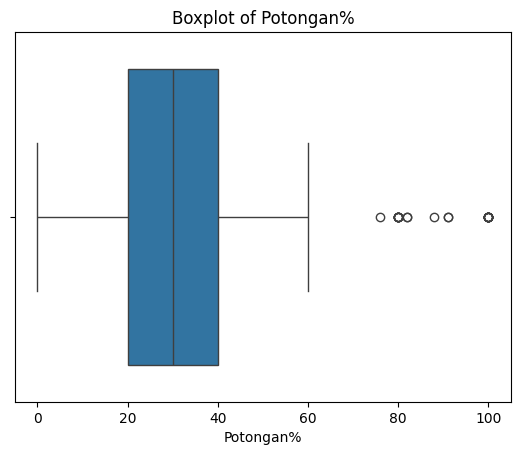

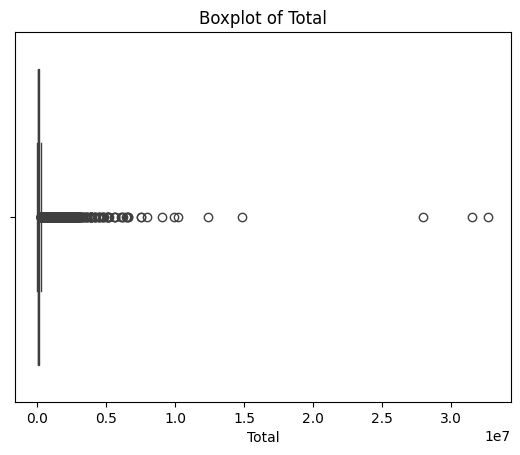

In [23]:
for col in ['Jumlah', 'Harga', 'Potongan%', 'Total']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

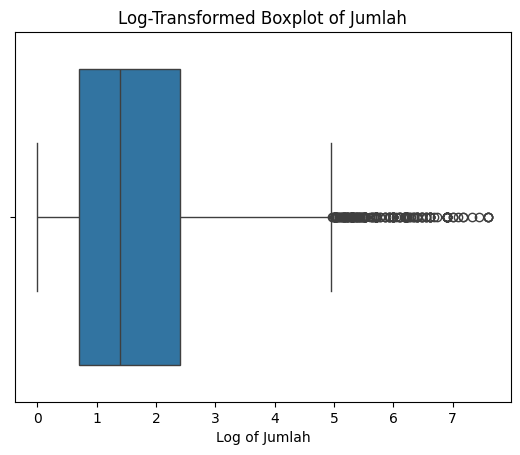

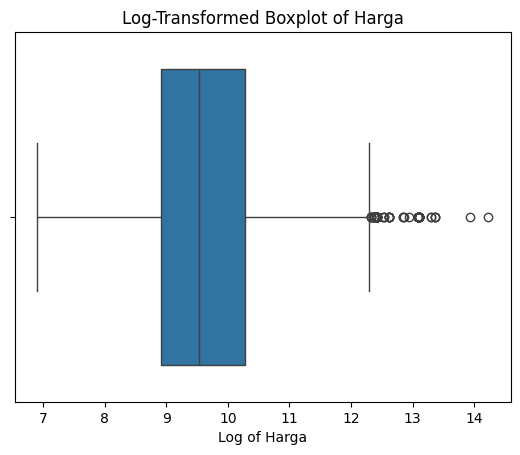

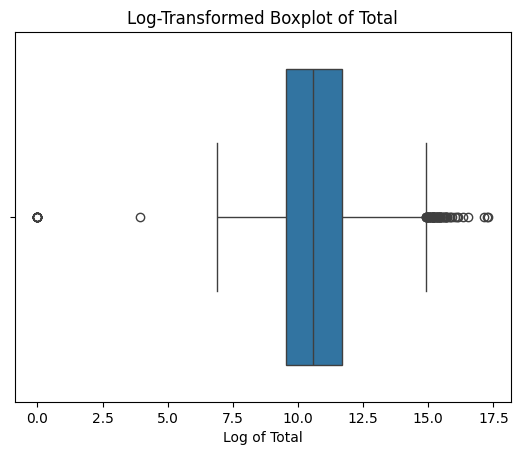

In [24]:
# Define the columns for transformation
columns = ['Jumlah', 'Harga', 'Total']

# Plot log-transformed boxplots
for col in columns:
    sns.boxplot(x=np.log1p(df[col]))  # np.log1p applies log(1 + x) transformation
    plt.title(f'Log-Transformed Boxplot of {col}')
    plt.xlabel(f'Log of {col}')
    plt.show()

Why Use Logarithmic Transformation?

1.	Compress Large Values: Logarithmic transformation compresses the range of large values, reducing their influence on visualizations or models.
2.	Handle Skewness: It transforms a highly skewed distribution into something closer to normal distribution.
3.	Improve Interpretability: Log-transformed data can help reveal trends or patterns that are hidden due to extreme values.

Example:

If the original values for Harga are:
- 1,000
- 10,000
- 1,000,000

The logarithmic transformation (base  e ) would convert these to:
-  \log(1,000+1) \approx 6.91 
-  \log(10,000+1) \approx 9.21 
-  \log(1,000,000+1) \approx 13.82 

This results in a much narrower range of values, making the data easier to visualize and interpret.

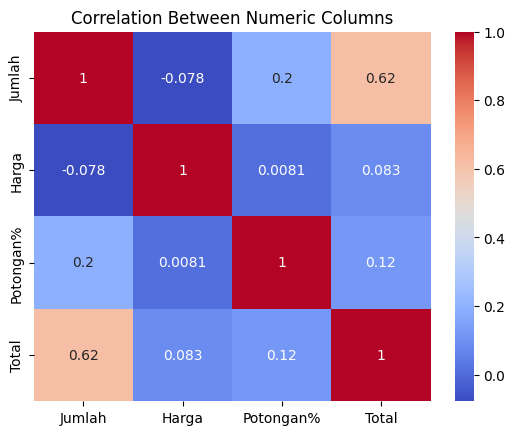

In [25]:
correlation_matrix = df[['Jumlah', 'Harga', 'Potongan%', 'Total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Columns')
plt.show()

In [30]:
# Recreate the analysis as the variable 'discount_analysis' is not defined in this session
discount_ranges = pd.cut(df['Potongan%'], bins=[0, 10, 20, 50, 100], labels=['0-10%', '10-20%', '20-50%', '50-100%'])
discount_analysis = df.groupby(discount_ranges).agg({'Jumlah': 'sum', 'Total': 'sum', 'Potongan%': 'count'})
discount_analysis.rename(columns={'Potongan%': 'Count'}, inplace=True)

# Convert 'Total' column to Rupiah format
discount_analysis['Total'] = discount_analysis['Total'].apply(lambda x: f"Rp {x:,.0f}")

# Rename columns to make the distinction clear
discount_analysis.rename(columns={
    'Jumlah': 'Total Quantity Sold (Jumlah)',
    'Count': 'Number of Transactions (Count)'
}, inplace=True)

discount_analysis

,Total Quantity Sold (Jumlah),Total,Number of Transactions (Count)
Potongan%,,,
0-10%,1989,"Rp 27,428,415",801
10-20%,4820,"Rp 70,666,073",1537
20-50%,207951,"Rp 1,617,833,144",6683
50-100%,11873,"Rp 48,785,912",122


In [32]:
# Get the top 20 items with the highest discount counts
top_20_discount_items = df.groupby(['Kode_Item', 'Nama_Item'])['Potongan%'].count().sort_values(ascending=False).head(20)

# Display the top 20 items
top_20_discount_items

Kode_Item  Nama_Item                                                 
MKGS0001   Matan Ta'lim Muta'alim Renggang                               123
MKGS0011   Matan Ghoyatu Wat Taqrib Renggang                              97
MKK00002   Kalender 12 Lembar Kosongan HVS MK 2024                        93
MKK00004   Kalender 6 Lembar Kosongan Masjid MK 2024                      88
MKI00021   Fathul Qorib Jilid 1 CD 334                                    84
MKGS0003   Matan Arba'in Nawawi Renggang                                  81
MKI00017   Fathul Mu'in Jilid 1 CD 385                                    80
MKGS0004   Matan Lubabul Hadist Renggang                                  78
MKGS0005   Matan Washiyatul Musthofa Renggang                             78
MKQ00001   Al-Qur'an Tanggung Lux HVS 624                                 75
MKK00009   Kalender 4 Lembar Tokoh NU ART MK 2024                         75
MKYI00019  Terjemah Yasin Fadhilah + 7Ayat Munjiyat Bsr HVS 96/Orange     72
MKI000

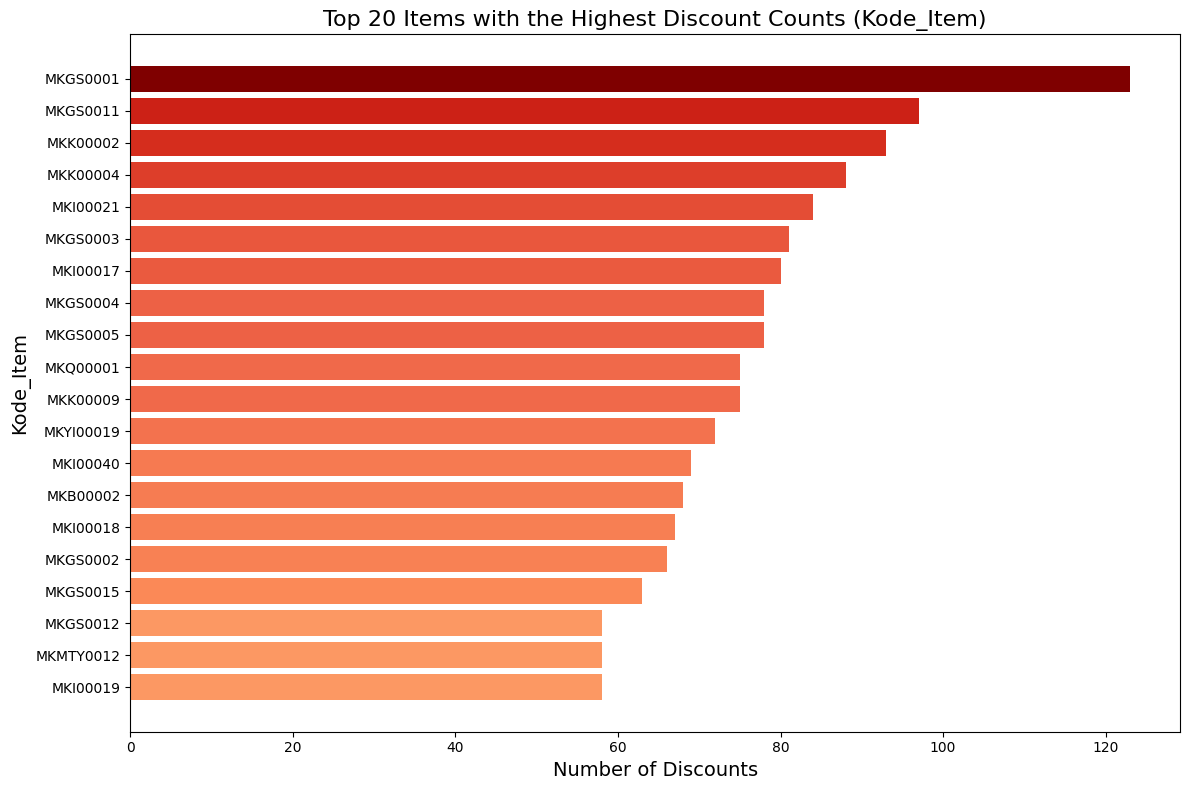

In [36]:
# Create a bar chart using a color gradient (warm colors)
plt.figure(figsize=(12, 8))
colors = plt.cm.OrRd(top_20_discount_items['Potongan%'] / max(top_20_discount_items['Potongan%']))

plt.barh(top_20_discount_items['Kode_Item'], top_20_discount_items['Potongan%'], color=colors)
plt.title('Top 20 Items with the Highest Discount Counts (Kode_Item)', fontsize=16)
plt.xlabel('Number of Discounts', fontsize=14)
plt.ylabel('Kode_Item', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

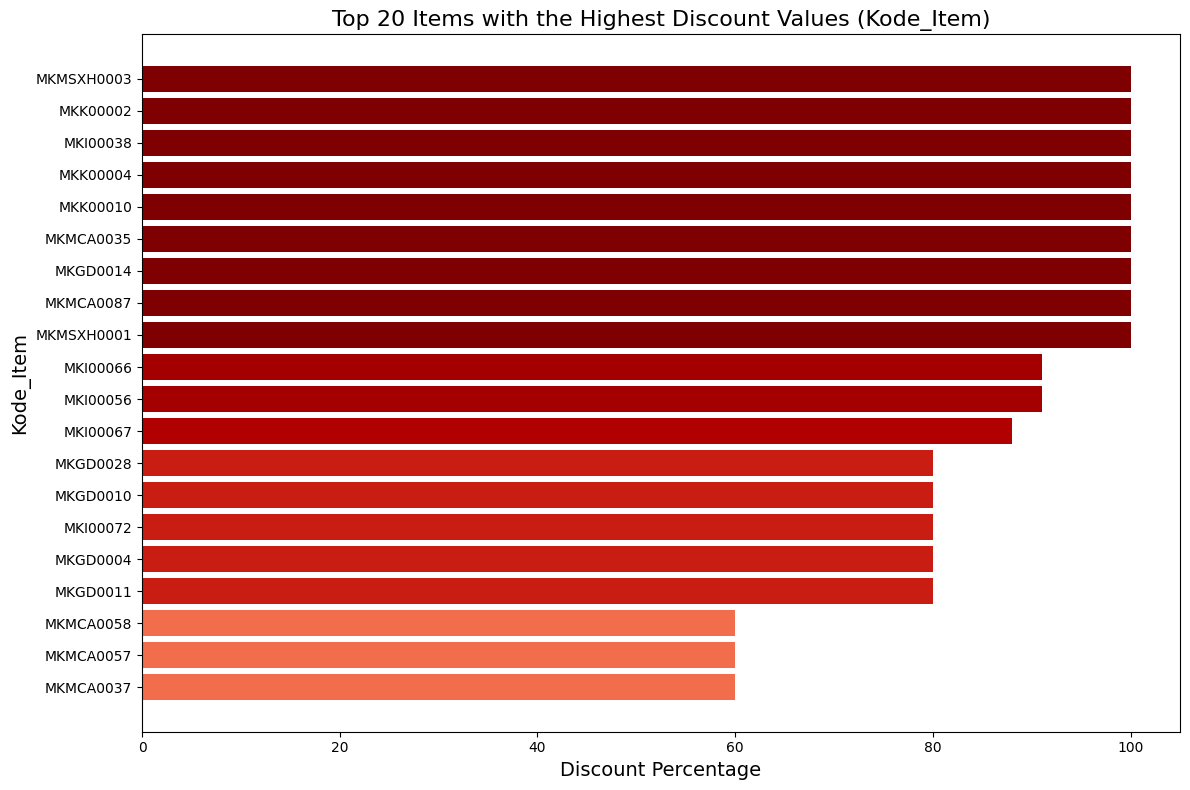

In [38]:
# Recreate the analysis for the highest discounts since the variable is not defined
top_20_highest_discounts = df.groupby(['Kode_Item', 'Nama_Item'])['Potongan%'].max().sort_values(ascending=False).head(20).reset_index()

# Create a bar chart with color grading for the highest discount values
plt.figure(figsize=(12, 8))
colors = plt.cm.OrRd(top_20_highest_discounts['Potongan%'] / max(top_20_highest_discounts['Potongan%']))

plt.barh(top_20_highest_discounts['Kode_Item'], top_20_highest_discounts['Potongan%'], color=colors)
plt.title('Top 20 Items with the Highest Discount Values (Kode_Item)', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Kode_Item', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [40]:
# Recreate the variables needed to get the ranks since 'common_kode_items_list' is not defined

# Find the intersection of Kode_Items from the two analyses
top_discount_counts_items = set(top_20_discount_items['Kode_Item'])
top_highest_discounts_items = set(top_20_highest_discounts['Kode_Item'])
common_kode_items_list = list(top_discount_counts_items.intersection(top_highest_discounts_items))

# Rank in Top Discount Counts
rank_discount_counts = top_20_discount_items.reset_index()
rank_discount_counts['Rank'] = rank_discount_counts.index + 1
discount_counts_ranks = rank_discount_counts[rank_discount_counts['Kode_Item'].isin(common_kode_items_list)]

# Rank in Top Discount Values
rank_highest_discounts = top_20_highest_discounts.reset_index()
rank_highest_discounts['Rank'] = rank_highest_discounts.index + 1
highest_discounts_ranks = rank_highest_discounts[rank_highest_discounts['Kode_Item'].isin(common_kode_items_list)]

# Combine the ranks into a single table
combined_ranks = pd.merge(
    discount_counts_ranks[['Kode_Item', 'Rank']].rename(columns={'Rank': 'Rank in Discount Counts'}),
    highest_discounts_ranks[['Kode_Item', 'Rank']].rename(columns={'Rank': 'Rank in Discount Values'}),
    on='Kode_Item'
)

combined_ranks

,Kode_Item,Rank in Discount Counts,Rank in Discount Values
0,MKK00002,3,2
1,MKK00004,4,4
